In [1]:
%pwd

'C:\\Users\\sc522\\PROJECTS\\STAT\\IS5\\exercise\\ch04'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import seaborn as sns

In [3]:
datafile = '../../dataset/ch04/load_factors_2016.txt'
load_factors = pd.read_csv(datafile, sep='\t')

In [4]:
load_factors.head()

,Year,Month,Domestic,International,Total,Decimal_Time
0,2000,1,61.97,66.63,64.07,2000.08333
1,2000,2,66.20,67.12,66.61,2000.16667
2,2000,3,73.19,75.63,74.26,2000.25000
3,2000,4,73.02,75.18,74.00,2000.33333
4,2000,5,73.25,76.10,74.55,2000.41667


In [5]:
load_factors.columns

Index(['Year', 'Month', 'Domestic', 'International', 'Total', 'Decimal_Time'], dtype='object')

In [6]:
domestic_flights = load_factors["Domestic"]
international_flights = load_factors["International"]

In [12]:
type(load_factors)

pandas.core.frame.DataFrame

In [13]:
type(domestic_flights)

pandas.core.series.Series

In [7]:
print(f'Sample size: {len(load_factors)}')

Sample size: 197


In [8]:
print(f'{domestic_flights.isna().sum()} data missing in Domestic')

0 data missing in Domestic


In [9]:
print(f'{international_flights.isna().sum()} data missing in International')

0 data missing in International


## Section 4.1 - Problem 1 (Load Factors 2016)

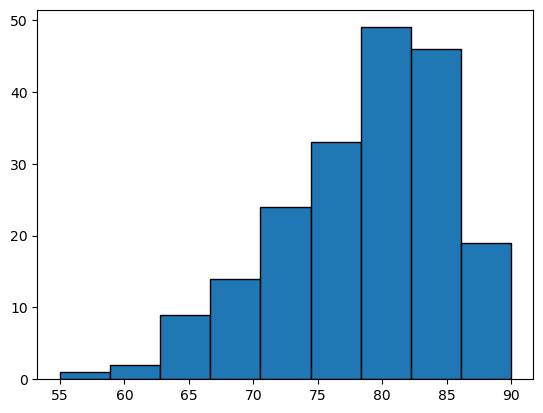

In [10]:
plt.hist(domestic_flights, bins=np.linspace(55, 90, 10), edgecolor='black');

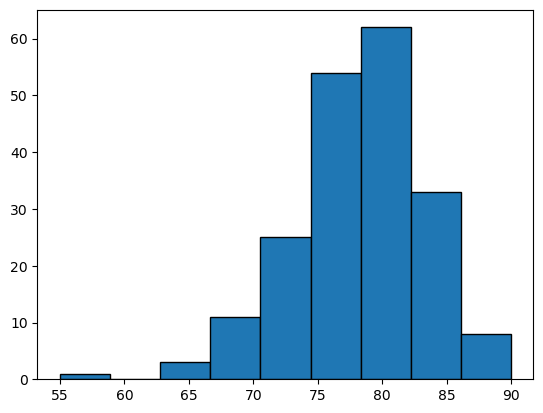

In [11]:
plt.hist(international_flights, bins=np.linspace(55, 90, 10), edgecolor='black');

In [14]:
def iqr(data):
    q75, q25 = np.percentile(data, [75, 25])
    return q75, q25, q75-q25

In [15]:
_q75, _q25, domestic_iqr = iqr(domestic_flights)
_q75, _q25, international_iqr = iqr(international_flights)

summary_of_domestic_international= pd.DataFrame(
data={
    'Mean': [round(stat.mean(domestic_flights), 4),
             round(stat.mean(international_flights), 4)
            ],
    
    'Median':[round(stat.median(domestic_flights), 2),
              round(stat.median(international_flights), 2)
            ],
    'StdDev':[round(stat.stdev(domestic_flights), 4),
              round(stat.stdev(international_flights), 4)
            ],
    'IQR': [round(domestic_iqr, 2),
           round(international_iqr, 2)
           ],
    
    'n': [ len(domestic_flights),
           len(international_flights)  
         ],
    'Missing': [domestic_flights.isna().sum(),
                international_flights.isna().sum()]
    },
    index=['Domestic', 'International']
)
summary_of_domestic_international

,Mean,Median,StdDev,IQR,n,Missing
Domestic,78.4802,80.07,6.4982,9.35,197,0
International,78.1434,78.86,5.0225,6.18,197,0


### Compare and contrast the distributions

* Shape: both distributions are unimodal, left skewed, without obvious outliers.

* Center: both distributions are centered around 78% as load factor measured in mean value (or 79-80% by median). Note: we cannot say the centers are different, because the difference may not be singnificant enough.  It may be due to randomness and sampling error.

* Spread: the domestic flights appear to have wider spread than the international flights


## Problem 2

In [22]:
# boolean indexing and bit-wise logic operators (&, |, ~)
test_df = pd.DataFrame(data={
                            'Grade':  ['A', 'B', 'C', 'D'],
                            'Height': [188.2, 142.4, 160.1, 167.2],
                            'Weight': [140.1, 98.2, 110.3, 106.5]
                            },
                       index=['Tom', 'Jerry', 'Marry', 'Jane']
#                       colums=['Grade', 'Height', 'Weight']
                      )
test_df

,Grade,Height,Weight
Tom,A,188.2,140.1
Jerry,B,142.4,98.2
Marry,C,160.1,110.3
Jane,D,167.2,106.5


In [25]:
test_df['Height']

Tom      188.2
Jerry    142.4
Marry    160.1
Jane     167.2
Name: Height, dtype: float64

In [31]:
test_df['Height'] >= 160

Tom       True
Jerry    False
Marry     True
Jane      True
Name: Height, dtype: bool

In [26]:
# Boolean indexing 
# maybe we want to extract a list of students whose heights are considered normal, e.g.
# taller than 160 cm
test_df[  test_df['Height'] >= 160  ]

,Grade,Height,Weight
Tom,A,188.2,140.1
Marry,C,160.1,110.3
Jane,D,167.2,106.5


In [29]:
test_df['Weight']

Tom      140.1
Jerry     98.2
Marry    110.3
Jane     106.5
Name: Weight, dtype: float64

In [28]:
test_df['Weight'] < 130

Tom      False
Jerry     True
Marry     True
Jane      True
Name: Weight, dtype: bool

In [30]:
test_df[ test_df['Weight'] < 130 ]

,Grade,Height,Weight
Jerry,B,142.4,98.2
Marry,C,160.1,110.3
Jane,D,167.2,106.5


In [35]:
test_df[(test_df['Height'] >= 160) & (test_df['Weight'] < 130)]

,Grade,Height,Weight
Marry,C,160.1,110.3
Jane,D,167.2,106.5


In [36]:
test_df[(test_df['Height'] >= 160) | (test_df['Weight'] < 130)]

,Grade,Height,Weight
Tom,A,188.2,140.1
Jerry,B,142.4,98.2
Marry,C,160.1,110.3
Jane,D,167.2,106.5


In [37]:
test_df[~(test_df['Height'] < 160) & (test_df['Weight'] < 130)]

,Grade,Height,Weight
Marry,C,160.1,110.3
Jane,D,167.2,106.5


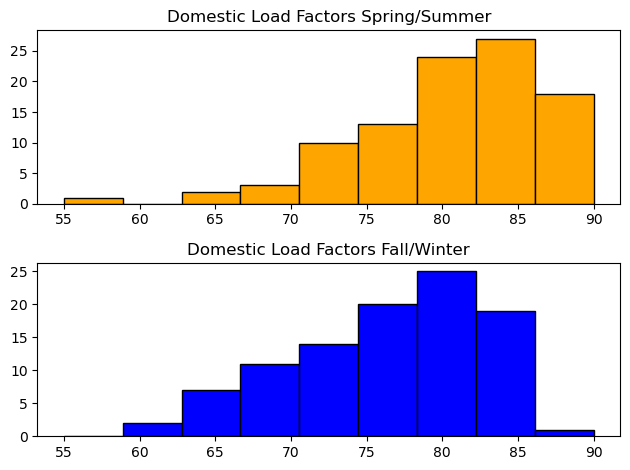

In [38]:
spring_summer_domestic = load_factors[(load_factors.Month>=4) &  # "ampersand" means bit-wise AND
                                      (load_factors.Month<=9)]['Domestic']
fall_winter_domestic = load_factors[(load_factors.Month<4) |  # "pipe" means bit-wise OR 
                                    (load_factors.Month>9)]['Domestic']
fig, axes = plt.subplots(2)
axes[0].hist(spring_summer_domestic, bins=np.linspace(55, 90, 10),
             color='orange', edgecolor='black');
axes[0].set_title('Domestic Load Factors Spring/Summer', fontsize=12)
axes[1].hist(fall_winter_domestic, bins=np.linspace(55, 90, 10),
             color='blue', edgecolor='black');
axes[1].set_title('Domestic Load Factors Fall/Winter', fontsize=12)
fig.tight_layout()

### Compare and contrast the histograms - Problem 2

Comparing both histograms, we see that domestic Load Factors is unimodal, left skewed, and without obvious outliers for the Fall/Winter season and the Spring/Summer season.

However, the distributions are not identical.  The spring/summer distribution shows an outlier on the left.  The fall/winter distribution has a lighter right tail compared to the spring/summer distribution.  The two have different modes around 85 and 80, respectively.

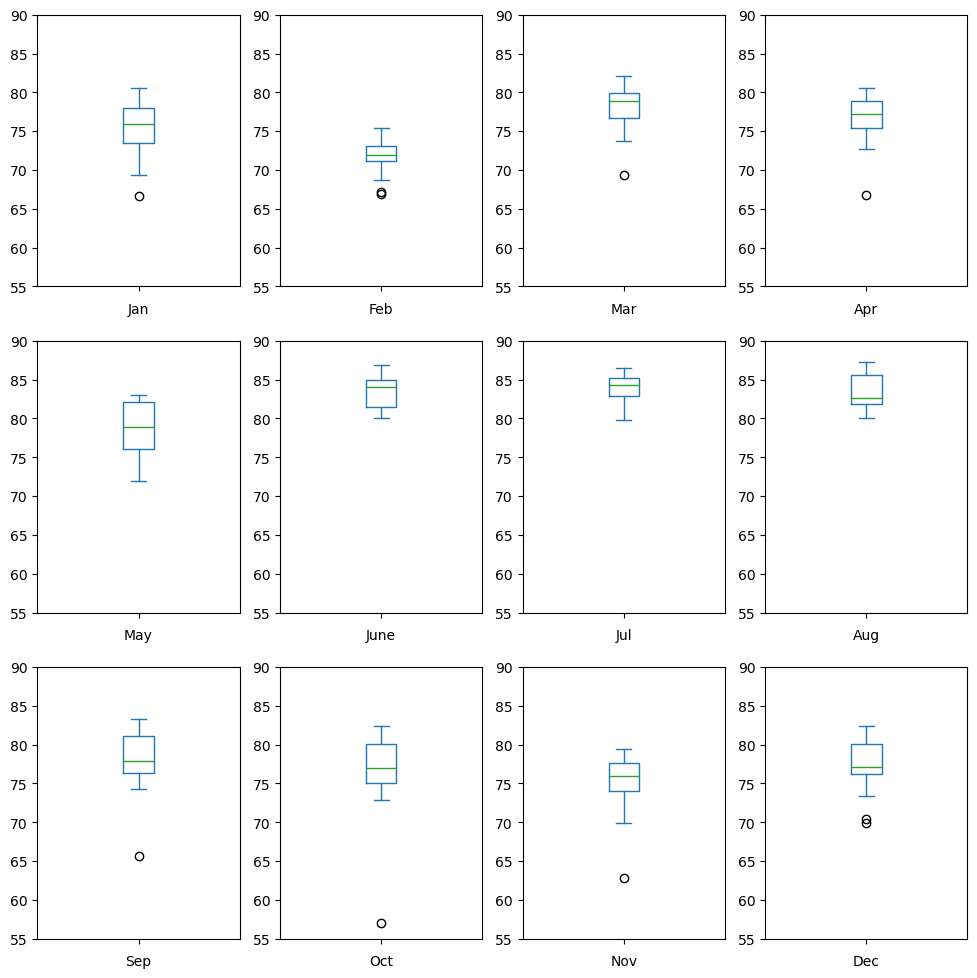

In [39]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(3,4, figsize=(12, 12))
for i in range(12):
    p = load_factors[load_factors.Month==i+1]['International'].plot(kind='box', ax=axes[i//4, i%4])
    p.set(ylim=[55, 90])
    p.set(xticklabels=[])
    p.set(xlabel=months[i])

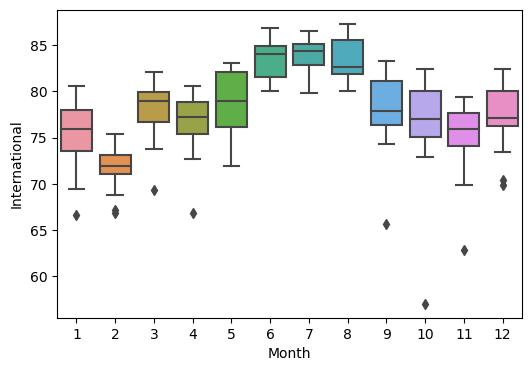

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=load_factors, x='Month', y='International');

### Problem 5: Discuss the patterns you see in this display.

There are outliers from January to April and from September to December. From September to January, the median remains at the same level. The highest load actors are in June, July and August.

Thinking: 
* each month has a box, revealing the characteristics of the distribution in that month.
* To describe a distribution, we can say something about its **Shape**, **Center**, and **Spread**.  To describe a few distributions altogether, we can describe the patterns in their shapes, centers, and spreads.
* It is hard to tell about the shape by looking at a box, so I will focus on the trend in the center and spread.  
* For the Shape, although I cannot easily tell about its **Modes** or **Symmetry**, but I can say something about the **Outliers**.

Conclusion:
* As for the center, we can look at the median.  Starting at January, the median load factor first decreases in February and then increases and remains at a stable level throughout May.  It reaches its maximum during the months from June to August.  It declines in September and keeps declining until reaching a local lowest level in November.  It then recovers in December to January the next year.
* Why? We may consider that the load factor is related to the number of travellers in a season.  The more people travelling, the higher the load factor reaches.  So, judging by the center, it appears that the summer months (June, July and August) see most travelers (coincidental with the summer vacation).  The worst occurs in February, when people are busy working or looking for jobs.
* As for the spread, we can look at the IQR, which is a measure of the box height in the box plot.  We see wide spread in May and narrow spread in February.
* Why? The spread tells us how tight or loose the data points are distributed along an axis.  Small spread says that the data are all crowded together around the center.  A large spread says the contrary, i.e., the data points are scatter everywhere.
* In May, we see large spread.  This means some days the load factor is high, whereas it is quite low on other days.  The airliner would face a high uncertainy (risk), because it is harder for them to predict the load factor in this Month.  Why people would purchase tickets and show up durinig some days but not on the other days?  This likely tells us that May is a "watershed" month.  The first half of May sees people tend to busy with their work and school, whereas traveling surges during the second half.  In other words, in May we are more like to see both the best and the worst days, thus leading to very wide spread.
* In February, the worst month of the year, as we seldom observe any good days, the spread is low.

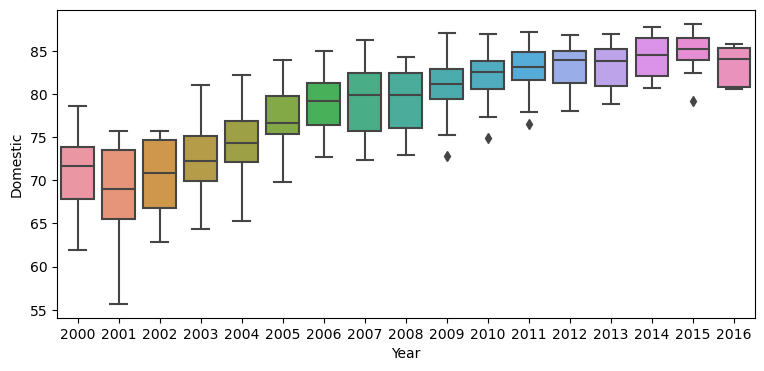

In [42]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=load_factors, x='Year', y='Domestic');

### Exercise-6 Discuss the patterns you see in this display

There is a long low whisker for the year 2001. There are outliers for the year of 2009 to 2011. The medians are at the same level for the year from 2011 to 2015. The load factors remins stable from year 2009 to 2015.

### Exercise 7.

**I think this question should refer to the box plots by year in Exercise 6 (rather than 5).**

The data for the years were affected by the terrorist attack of 9/11. There is an outlier in the month of September that in the exercise 6 plot. 

*It should not be set aside in any overall analysis of load factors. However, we should report the outlier and analyses with and without the outlier so that a reader can judge the influence of the outlier for him.*  **Is it right?**

Comments:

* Sep. 11, 2001 sees an unusually attack that disturbs the transportational industry for the 4th quarter of that year.  Accordingly, travalling-related data display abnormal patterns, such as the long low wisker in the above plot by year.
* This kind of abnormality should be taken out when pool all the data in an overall analysis.  This is because, in an overall analysis, we would like to learn generic behavior accross the years, and the trend in the years.  We then should not include any data reflecting an abnormal event that probably and hopefully would never repeat.

### Exercise 8.


From the patterns that show in exercise-6, the year 2001 has a long whisker that is much less than 60% and without outlier. The single outlier in exercise-8, its whisker is above 60% and the outlier is a far outlier.

In Exercise 6, the domestic load factors are grouped by year.  One year's outlier may or may NOT be an outlier for another year.  The outlier dectected is in year 2015.  Year 2015 sees a narrow spread, and an moderately low value may be considered an outlier in that year.  In contrast, year 2001 sees much wider (or maybe the widest) spread, which incorporates all the data points as normal.

However, once we pool all the data together, we can reach the below box plot (not grouped by year or any other variable).  This time, there is one single outlier way lower than typical values of all the other values.  We can easily pick it out from the dataset.  It is Sep. 2001.  It is truly an outlaying event, which is detected once we pool all the normal years together.

This is also why in exercise 7 it is recommended to take this Sep 2001 month out when analyzing all the data.

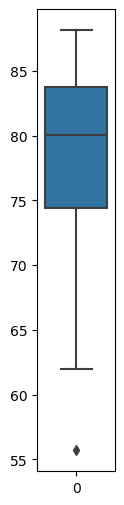

In [47]:
plt.figure(figsize=(1, 6))
sns.boxplot(data=domestic_flights);

In [48]:
load_factors[load_factors['Domestic']<60]

,Year,Month,Domestic,International,Total,Decimal_Time
20,2001,9,55.71,65.65,60.34,2001.75
